In [ ]:
# Load the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving COPY OF HR Employee Attrition.csv to COPY OF HR Employee Attrition (1).csv


In [ ]:
# Pandas is the Python package for data frames

import pandas as pd

In [ ]:
# Part 1 Data Acquisition

# Read data from a CSV file into a data frame
df = pd.read_csv('COPY OF HR Employee Attrition (1).csv')

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8      

In [ ]:
# Part 3 Missing Value Imputation

# Show the number of missing values for each variable in the data frame
df.isnull().sum()

# Drop ZIP Code for now
rvar_list =['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_sample1 = df.drop(columns=rvar_list)

# Separate all the variables into two lists for future column indexing
# One for numerical, the other for categorical 
cvar_list = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole','JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance' ]
nvar_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Check if there is any missing value left
df_sample1.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
# Part 4 Variable Transformation

# For classificaiton tree, we skip standardizing the numerical variables 
df_sample2 = df_sample1.copy()
## df_sample2[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.

df_sample4 = df_sample3.copy()
df_sample4 = pd.get_dummies(df_sample3, prefix_sep='_')

# Remove the redundant dummies (Step 2 of dummy coding)
# Placeholder variable: rdummies
rdummies = ['Attrition_No', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Education_3',  'EducationField_Life Sciences','EnvironmentSatisfaction_3', 'Gender_Female', 'JobInvolvement_3', 'JobLevel_1', 'JobRole_Sales Executive', 'JobSatisfaction_4', 'MaritalStatus_Married' ,'OverTime_No', 'PerformanceRating_3', 'RelationshipSatisfaction_3', 'StockOptionLevel_0', 'WorkLifeBalance_3'] 
#rdummies = ['PersonalLoan_No']
df_sample5 = df_sample4.copy()
df_sample5 = df_sample4.drop(columns=rdummies)

# Get the remaining variable list after the variable transformation
print(df_sample5.columns.values)

# Display the milestone dataframe. Compare it with the original dataframe.
print(df_sample5)
print(df)

['Age' 'DailyRate' 'DistanceFromHome' 'HourlyRate' 'MonthlyIncome'
 'MonthlyRate' 'NumCompaniesWorked' 'PercentSalaryHike'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'Attrition_Yes' 'BusinessTravel_Non-Travel'
 'BusinessTravel_Travel_Frequently' 'Department_Human Resources'
 'Department_Sales' 'Education_1' 'Education_2' 'Education_4'
 'Education_5' 'EducationField_Human Resources' 'EducationField_Marketing'
 'EducationField_Medical' 'EducationField_Other'
 'EducationField_Technical Degree' 'EnvironmentSatisfaction_1'
 'EnvironmentSatisfaction_2' 'EnvironmentSatisfaction_4' 'Gender_Male'
 'JobInvolvement_1' 'JobInvolvement_2' 'JobInvolvement_4' 'JobLevel_2'
 'JobLevel_3' 'JobLevel_4' 'JobLevel_5'
 'JobRole_Healthcare Representative' 'JobRole_Human Resources'
 'JobRole_Laboratory Technician' 'JobRole_Manager'
 'JobRole_Manufacturing Director' 'JobRole_Research Director'
 'JobRole_Research Scientis

In [ ]:
# Part 5 Data Partiton

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df_sample5
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
163   57.0      334.0              24.0        83.0         9439.0   
47    37.0      408.0              19.0        73.0         3022.0   
1085  31.0      561.0               3.0        33.0         4084.0   
98    58.0      682.0              10.0        37.0        13872.0   
942   36.0      325.0              10.0        63.0         7094.0   
...    ...        ...               ...         ...            ...   
715   33.0      827.0               1.0        84.0         5488.0   
905   29.0      694.0               1.0        87.0        16124.0   
1096  40.0      898.0               6.0        38.0        16437.0   
235   43.0     1034.0              16.0        80.0        16064.0   
1061  24.0      830.0              13.0        78.0         2033.0   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
163       23402.0                 3.0               16.0               12.0   
4

In [ ]:
# Part 6 Classification tree 

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: tree 
# Required function name: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'Attrition_Yes'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile


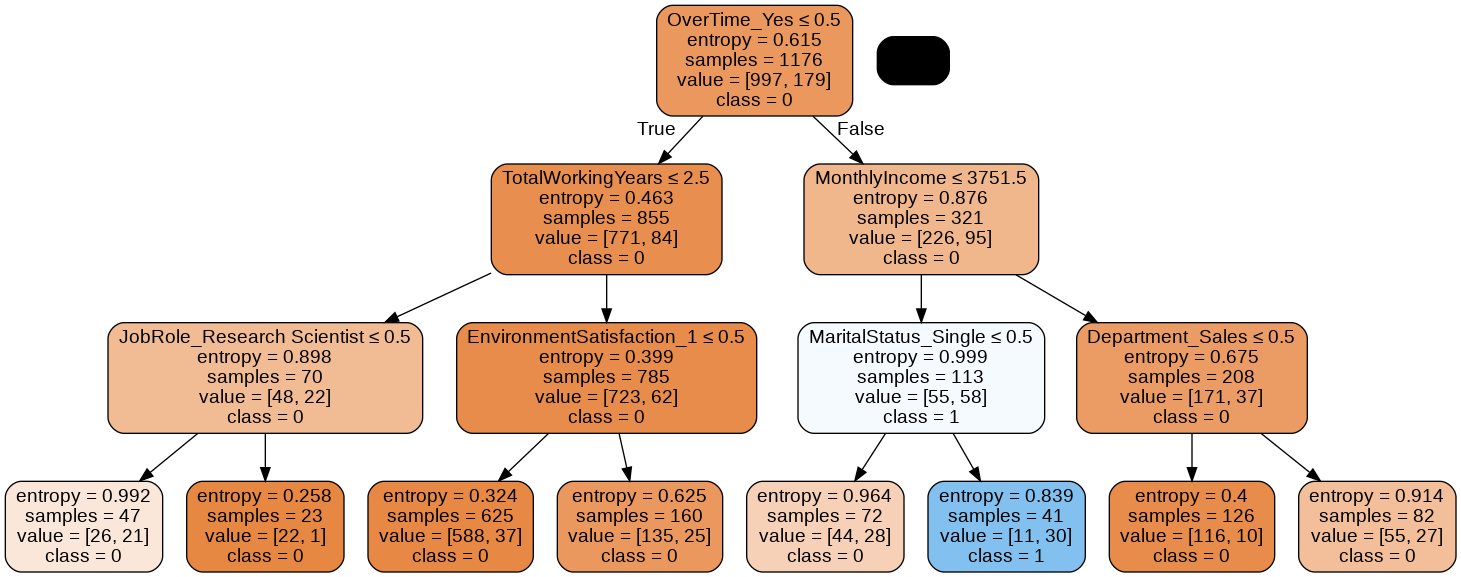

In [ ]:
# Run Classification tree with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

# Create a user-defined function, profit_calcuation, that calcuates the profit over a dataset 
# for which we know the actual class (e.g., acceptance/rejection upon receiving a offer) from y_value
# and the predictors values (e.g., consumers age, experience, income) from x_value
# using the probability prediction model carried by the model object model.

def profit_calculation(model, x_value, y_value):
  
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11

  # Get the decisions made by the decision rule for each observation in the dataset
  # The method predict_proba is to get the predicted probability
  # Then we compare the predicted probabilities with the decision cut-off d_cutoff
  # True means SEND, False means NOT SEND
  # list() is to convert the results into a Python list
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  
  # We put the actual class into a Python list called y
  y = list(y_value)
  
  # Get the number of observations of the dataset and put it into n_obs
  n_obs = len(y)

  # cum_profit is for cumulating the profit during the for-loop
  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

# Set n_jobs to be -1 to run  on all CPU cores.
# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case roc_auc - returns.

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))




In [ ]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

3
0.7240283459964933


In [ ]:
import numpy as np

# The user-defined function for getting the tree path
# Author: Federico Ibba on stackoverflow.com 
# Created date: Jan 19, 2018
# URL: https://stackoverflow.com/questions/32506951/how-to-explore-a-decision-tree-built-using-scikit-learn/35911666
# Modified by Lin Hao during Oct. 2020

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['MaritalStatus_Single <= 0.5', 'TotalWorkingYears <= 2.5', 'JobRole_Research Director <= 0.5']
sample = 47
value = [26, 21]
class =  0

Leaf node ID = 2
Path = ['MaritalStatus_Single <= 0.5', 'TotalWorkingYears <= 2.5', 'JobRole_Research Director > 0.5']
sample = 23
value = [22, 1]
class =  0

Leaf node ID = 3
Path = ['MaritalStatus_Single <= 0.5', 'TotalWorkingYears > 2.5', 'EducationField_Technical Degree <= 0.5']
sample = 625
value = [588, 37]
class =  0

Leaf node ID = 4
Path = ['MaritalStatus_Single <= 0.5', 'TotalWorkingYears > 2.5', 'EducationField_Technical Degree > 0.5']
sample = 160
value = [135, 25]
class =  0

Leaf node ID = 5
Path = ['MaritalStatus_Single > 0.5', 'MonthlyIncome <= 3751.5', 'MaritalStatus_Divorced <= 0.5']
sample = 72
value = [44, 28]
class =  0

Leaf node ID = 6
Path = ['MaritalStatus_Single > 0.5', 'MonthlyIncome <= 3751.5', 'MaritalStatus_Divorced > 0.5']
sample = 41
value = [11, 30]
class =  1

Leaf node ID = 7
Path = ['Marital